<a href="https://colab.research.google.com/github/DiegoLeonG96/Tarea2_MLA/blob/main/Tarea_2_MLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    <em>Curso: Machine Learning Avanzado </em><br>

</div>


# Tarea 2: Red Neuronal Convolucional
**Integrantes**:
- Kurt Castro
- Diego León
- Cristian Pizarro

## 1. Introducción

Las redes neuronales convolucionales se han consolidado como una herramienta de amplio uso en múltiples industrias gracias a su capacidad de procesar datos visuales, siendo utilizado ya sea para el desarrollo de vehículos autónomos, sistemas de reconocimiento facial, procedimientos de control de calidad (clasificando la producción según estado u otra característica), entre muchos otros.

En el presente trabajo utilizaremos la base de datos ‘Muffin vs Chihuahua’ disponibilizada en Kaggle por Shreyas Mocherla. Ésta contiene, como su nombre lo indica, imágenes de Muffins y Chihuahuas, las cuales son visualmente muy similares. El desafío que se propone es precisamente desarrollar un modelo de clasificación que logre sortear estas semejanzas o patrones que no son claramente distinguibles.  


## 2. Objetivo

El objetivo principal será generar un modelo de clasificación basado en redes neuronales convolucionales que logre clasificar correctamente las imágenes en Chihuahas o Muffins.

Los objetivos secundarios serán asegurar un correcto procesamiento y balance de los datos, así como también garantizar la mejor precisión, ajuste y desempeño general posible mientras controlamos su estabilidad.


## 3. Metodología utilizada

Con el fin de cumplir con los objetivos definidos, se generó una serie secuencial de modelos en base a redes neuronales convolucionales, los cuales sufrieron modificaciones tanto en su estructura como en hiperparámetros. Estos ajustes se realizaron ya sea en función de los problemas observados o con la finalidad de buscar un mejor rendimiento.
Adicionalmente, se generó un modelo de Perceptrón Multicapa como punto de partida, con el objetivo de comparar el rendimiento de estos dos tipos de modelos para el procesamiento de imágenes.   

Los modelos fueron evaluados inicialmente a través de su precisión, de la evolución de sus funciones de pérdida, de su ajuste y estabilidad (comparativa de precisión y ajuste en entrenamiento y testeo). Y dado que este es un ejercicio de clasificación, se consideró de manera complementaria el área bajo la curva de los modelos (AUC).

A continuación se describen los modelos y criterios definidos, los cuales como punto de partida consideran un learning rate de 0.01, batch size de 32 y una función de 'early stopping' que detendrá el entrenamiento del modelo cuando las épocas muestren un empeoramiento en la pérdida de validación y, adicionalmente, restaurará los pesos del mejor modelo registrado:

1.   **Perceptrón Multicapa:**

2.   **Red Neuronal convolucional 1:** Como punto de partida para los modelos convolucionales, se definen 4 capas convolucionales con activación 'ReLU', 1 capa densa después del aplanado, junto con la capa densa de salida con activación sigmoide (dado que la clasificación es binaria). Este primer modelo mostró un grave problema de sobreajuste y también de ruido, que se ajustará en las siguientes instancias.  

3.   **Red Neuronal convolucional 2:** Dado que el modelo anterior mostraba sobreajuste, en éste se añade una técnica de regulariación por Dropout en cada capa de la estructura, siendo de 0.25 antes del aplanado y de 0.5 después del aplanado. Los resultados de éste ejercicio fueron exitosos, demostrando un buen control del sobreajuste, aunque todavía con espacios de mejora (se muestra un muy ligero sobreajuste, pero dentro de rangos aceptables).

4.   **Red Neuronal convolucional 3:** Este tercer modelo fue ajustado en función de controlar el ruido y mejorar la estabilidad del modelo. El principal problema que mostraba el modelo anterior es que la precisión y la pérdida de los datos de validación tenian una alta volatilidad a través de las épocas. Por este motivo, se modificó el hiperparámetro de learning rate en la compilación, pasando de 0.01 a 0.0001. Adicionalmente, se modificó el batch size, pasando de 32 a 512. La paciencia de la función 'Early stopping' se aumentó a 20, dado que una tasa menor de aprendizaje hace que el modelo tarde más en aprender.

  Éste ejercicio fue exitoso, logrando obtener un modelo que no sólo demostró un  correcto rendimiento y ajuste, sino que también una buena estabilidad.

5.   **Red Neuronal convolucional 4:** Éste modelo se desarrolló con el objetivo de empujar aún más la corrección del "sobreajuste" (el cual es muy ligero). Para ello simplemente se redujo el número de capas convolucionales, de 4 a 3.

  Sin embargo, el modelo no mostró una mejoría en este aspecto y, además, la precisión de validación y el rendimiento general (AUC) empeoraron ligeramente.
Por este motivo, el modelo no se consideró para posteriores ajustes.

6.   **Red Neuronal convolucional 5:** Se continuó intentando mejorar el ajuste, pero esta vez a través de un segundo método de regularización, añadiendo regularización L2 a la estructura. Se utiliza un valor muy bajo (0.0001), dado que el sobreajuste es muy ligero, y por el hecho de que queremos evitar empeorar la pérdida (valores más altos efectivamente aumentan la pérdida, tanto en entrenamiento como en validación).

  Los resultados tampoco demostraron un mejor ajuste del modelo, y se observó una ligera disminución de la precisión y el AUC, por lo que no se consideró para posteriores ajustes.

7.   **Red Neuronal convolucional 6:** se intenta aumentar aún más la precisión del modelo y el rendimiento general. Para ello nos preguntamos si los contornos de las imágenes nos proporcionarían información relevante. Bajo este objetivo e interrogante se añadió el parámetro de 'padding' en la estructura de la red.

8. **Red Neuronal convolucional 7:** Finalmente, se busca reducir totalmente los efectos de overfitting observados en modelos anteriores. Para lo anterior, se utiliza una estrategia de **data augmentation** que puede rotar, desplazar y hacer zoom en cada imagen para lograr un mejor nivel de generalización.

  Los resultados muestran que no existe una diferencia significativa en el rendimiento del modelo (ligeramente peor AUC), por lo que es probable que los contornos no contengan patrones de información esencial para la clasificación.



## 4.  Carga y Preprocesamiento de Datos

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras import models, layers, optimizers, regularizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.losses import binary_crossentropy
import matplotlib.pyplot as plt
import random
import kagglehub
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

# Para graficar matriz de confusión y classification report

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Establecemos semillas (Python, Numpy, Tensorflow)
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
# Verifica las GPUs disponibles
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"Se encontró GPU: {gpus}")
else:
    print("No se encontró GPU. Asegúrate de haber activado el entorno con GPU en Colab.")

Se encontró GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Download latest version
path = kagglehub.dataset_download("samuelcortinhas/muffin-vs-chihuahua-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2


In [4]:
base_path = "/root/.cache/kagglehub/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification/versions/2"

In [5]:
# train y test
train_dir = f'{base_path}/train'
test_dir = f'{base_path}/test'

batch_size = 32
num_classes = 2


# generators
image_size = (150, 150)
input_shape = (150, 150, 3)

# Cargar datos directamente
X_train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

X_test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=image_size,
    batch_size=batch_size
)

# Convertir a tensores numpy si es necesario
X_train, y_train = [], []
for images, labels in X_train_ds:
    X_train.append(images.numpy())
    y_train.append(labels.numpy())

X_test, y_test = [], []
for images, labels in X_test_ds:
    X_test.append(images.numpy())
    y_test.append(labels.numpy())

# Combinar los datos en arreglos numpy
X_train = np.concatenate(X_train)
y_train = np.concatenate(y_train).ravel()
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test).ravel()

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.
X_train shape: (4733, 150, 150, 3), y_train shape: (4733,)
X_test shape: (1184, 150, 150, 3), y_test shape: (1184,)


In [6]:
train_class_counts = Counter(y_train)
test_class_counts = Counter(y_test)

print("Distribución de clases en el conjunto de entrenamiento:")
total_train = sum(train_class_counts.values())
for cls, count in train_class_counts.items():
    proportion = count / total_train * 100
    print(f"Clase {int(cls)}: {count} muestras ({proportion:.2f}%)")

print("\nDistribución de clases en el conjunto de prueba:")
total_test = sum(test_class_counts.values())
for cls, count in test_class_counts.items():
    proportion = count / total_test * 100
    print(f"Clase {int(cls)}: {count} muestras ({proportion:.2f}%)")

Distribución de clases en el conjunto de entrenamiento:
Clase 1: 2174 muestras (45.93%)
Clase 0: 2559 muestras (54.07%)

Distribución de clases en el conjunto de prueba:
Clase 0: 640 muestras (54.05%)
Clase 1: 544 muestras (45.95%)


Se observa un correcto balance de clases, por lo cual no es necesario aplicar alguna estrategia de balanceo de clases

## 5. Aplicación de Modelos

## MLP (Multilayer Perceptron)

In [ ]:
# Dimensiones originales de las imágenes
num_samples, height, width, channels = X_train.shape

# Aplanamos las imágenes
X_train_flattened = X_train.reshape(num_samples, height * width * channels)

# Aplanamos el conjunto de pruebas
X_test_flattened = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3])

Epoch 1/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.5488 - loss: 22364.4199 - val_accuracy: 0.7117 - val_loss: 415.2614
Epoch 2/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6475 - loss: 761.9553 - val_accuracy: 0.6494 - val_loss: 533.8163
Epoch 3/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6305 - loss: 655.3630 - val_accuracy: 0.6832 - val_loss: 53.0878
Epoch 4/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7411 - loss: 25.1058 - val_accuracy: 0.7302 - val_loss: 5.1957
Epoch 5/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7672 - loss: 1.9130 - val_accuracy: 0.7302 - val_loss: 0.7651
Epoch 6/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7978 - loss: 0.5252 - val_accuracy: 0.7376 - val_loss: 0.6895
Epoch 7/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8044 - loss: 0.4839 - val_accuracy: 0.7350 - val_loss: 0.7105
Epoch 8/100
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8104 - loss: 0.4798 - va

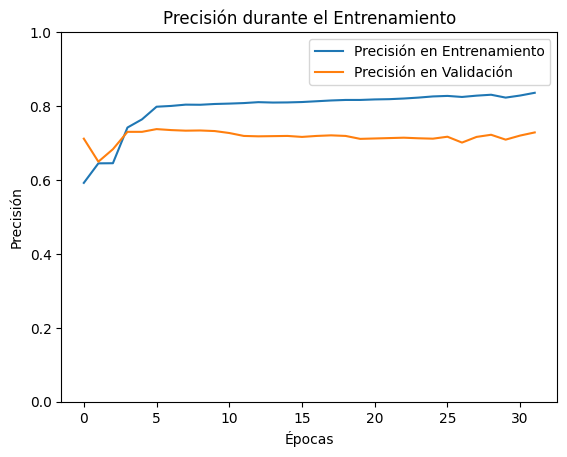

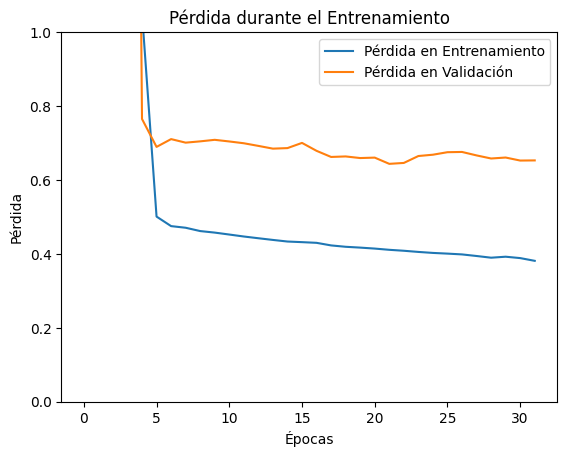

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
AUC del modelo: 0.8018


In [ ]:
# Definimos la estructura
hidden_units = 128
batch_size = 32
lr = 1e-2
model_mlp = Sequential([
    Dense(hidden_units, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1))
])

# Compilamos
model_mlp.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

#Entrenamos
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model_mlp.fit(X_train_flattened, y_train,
                    epochs=100,
                    batch_size=batch_size,
                    validation_split=0.4,
                    callbacks=[early_stopping])

# Evaluamos el modelo
train_acc=model_mlp.evaluate(X_train_flattened, y_train, batch_size=batch_size)[1]
test_acc=model_mlp.evaluate(X_test_flattened, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_mlp.predict(X_test_flattened)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


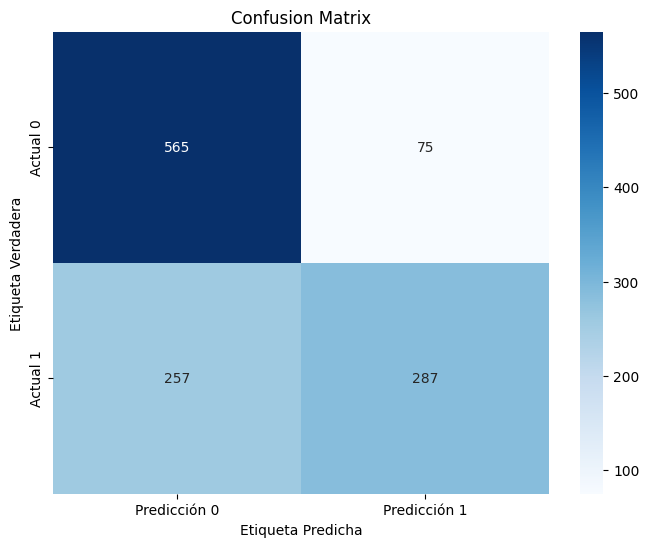

              precision    recall  f1-score   support

         0.0       0.69      0.88      0.77       640
         1.0       0.79      0.53      0.63       544

    accuracy                           0.72      1184
   macro avg       0.74      0.71      0.70      1184
weighted avg       0.74      0.72      0.71      1184



In [ ]:
# Predicción sobre test
y_pred = model_mlp.predict(X_test_flattened)
y_pred_classes = (y_pred > 0.5).astype(int) # Convertimos probabilidades a clases
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Plot matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Imprimir classification report
print(classification_report(y_test, y_pred_classes))

## Red Neuronal Convolucional 1

In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-2),
             metrics=['accuracy'])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.7767 - loss: 0.5924 - val_accuracy: 0.7306 - val_loss: 0.7782
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.8754 - loss: 0.3232 - val_accuracy: 0.7779 - val_loss: 0.6853
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8895 - loss: 0.2669 - val_accuracy: 0.8252 - val_loss: 0.4572
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9206 - loss: 0.2073 - val_accuracy: 0.5084 - val_loss: 2.6338
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9317 - loss: 0.1765 - val_accuracy: 0.7492 - val_loss: 0.9279
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9463 - loss: 0.1488 - val_accuracy: 0.8294 - val_loss: 0.7686
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9515 - loss: 0.1304 - val_accuracy: 0.6199 - val_loss: 1.8498
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.9396 - loss: 0.1471 

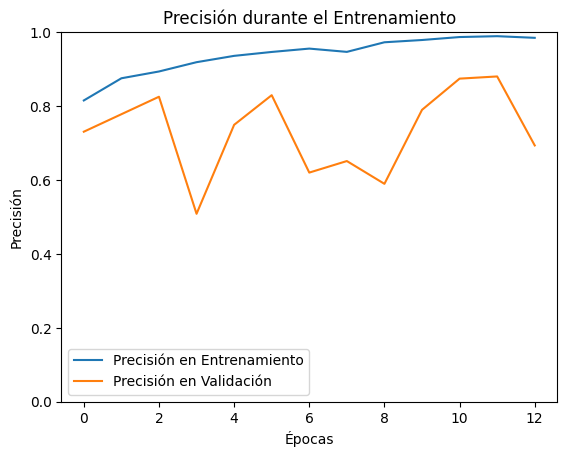

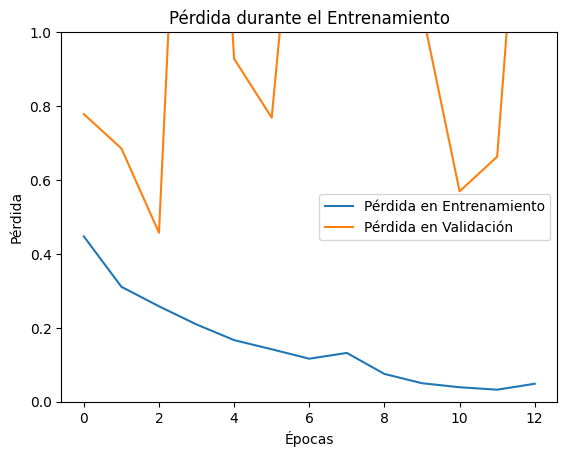

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9293


In [ ]:
batch_size = 32
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


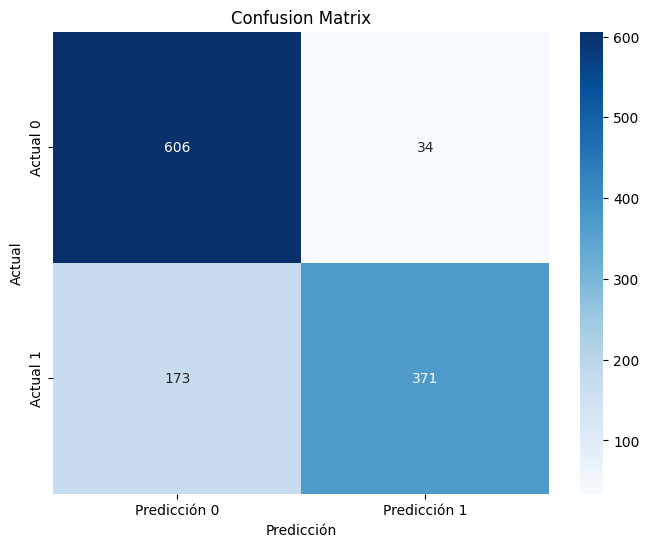

              precision    recall  f1-score   support

         0.0       0.78      0.95      0.85       640
         1.0       0.92      0.68      0.78       544

    accuracy                           0.83      1184
   macro avg       0.85      0.81      0.82      1184
weighted avg       0.84      0.83      0.82      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## Red Neuronal Convolucional 2.

Objetivo: Control de Sobreajuste.

Medida: Se añade Dropout.

In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-2),
             metrics=['accuracy'])

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.7320 - loss: 0.6326 - val_accuracy: 0.6791 - val_loss: 1.1308
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.8490 - loss: 0.3727 - val_accuracy: 0.8252 - val_loss: 0.5075
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.8654 - loss: 0.3367 - val_accuracy: 0.7922 - val_loss: 0.5511
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.8891 - loss: 0.2858 - val_accuracy: 0.7078 - val_loss: 0.8386
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.8847 - loss: 0.2846 - val_accuracy: 0.8438 - val_loss: 0.4357
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.9092 - loss: 0.2267 - val_accuracy: 0.7796 - val_loss: 0.4970
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9240 - loss: 0.2029 - val_accuracy: 0.6909 - val_loss: 1.1294
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9130 - loss: 0.2215 -

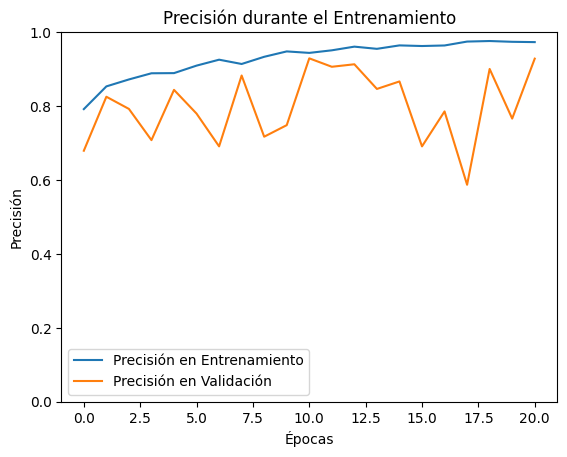

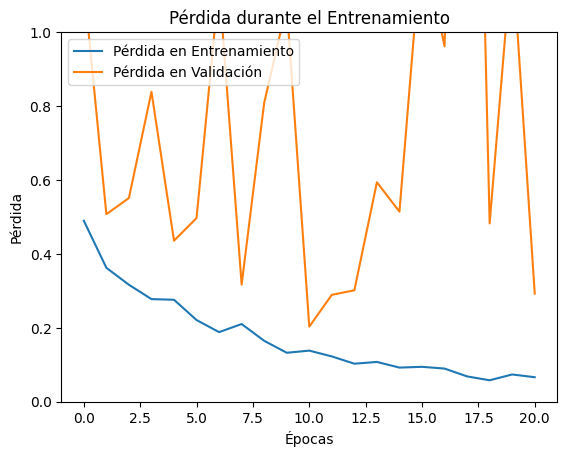

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9766


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
batch_size = 32
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


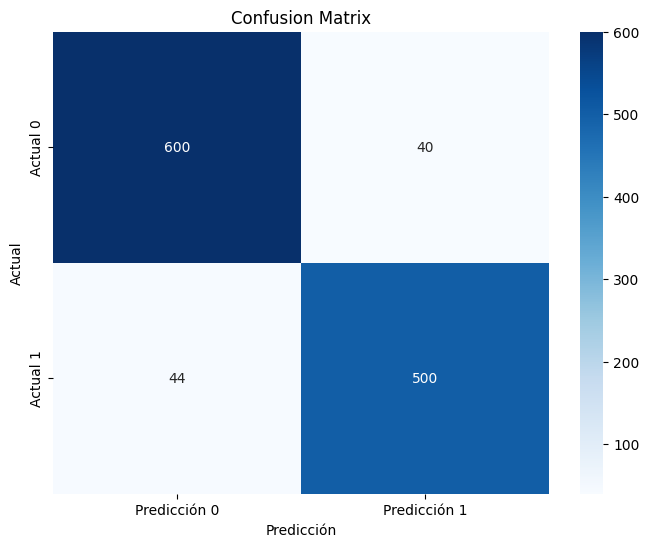

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       640
         1.0       0.93      0.92      0.92       544

    accuracy                           0.93      1184
   macro avg       0.93      0.93      0.93      1184
weighted avg       0.93      0.93      0.93      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## Red Neuronal Convolucional 3.

Objetivo: Control de ruido / Mejorar estabilidad.

Primero se modifica el learning rate (a uno aún más bajo).

Posteriormente se modifica el batch size (a uno más alto).

Ambas modificaciones deberían ayudarnos a reducir el ruido observado en la precisión y pérdida de los datos de validación.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6103 - loss: 0.8248 - val_accuracy: 0.5659 - val_loss: 1.2960
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 393ms/step - accuracy: 0.7591 - loss: 0.5602 - val_accuracy: 0.6976 - val_loss: 0.6160
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 429ms/step - accuracy: 0.8084 - loss: 0.4921 - val_accuracy: 0.6258 - val_loss: 0.7585
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 429ms/step - accuracy: 0.8256 - loss: 0.4474 - val_accuracy: 0.7019 - val_loss: 0.6130
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 427ms/step - accuracy: 0.8426 - loss: 0.4060 - val_accuracy: 0.6850 - val_loss: 0.6602
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - accuracy: 0.8396 - loss: 0.4008 - val_accuracy: 0.7230 - val_loss: 0.5670
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 399ms/step - accuracy: 0.8508 - loss: 0.3857 - val_accuracy: 0.6926 - val_loss: 0.6127
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 403ms/step - accuracy: 0.8537 - loss: 0.3650 - val_accura

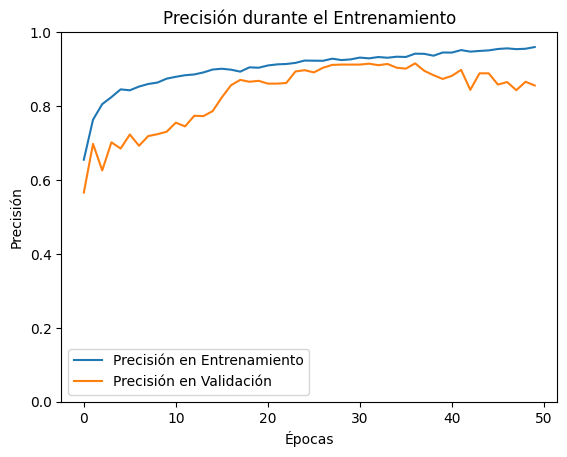

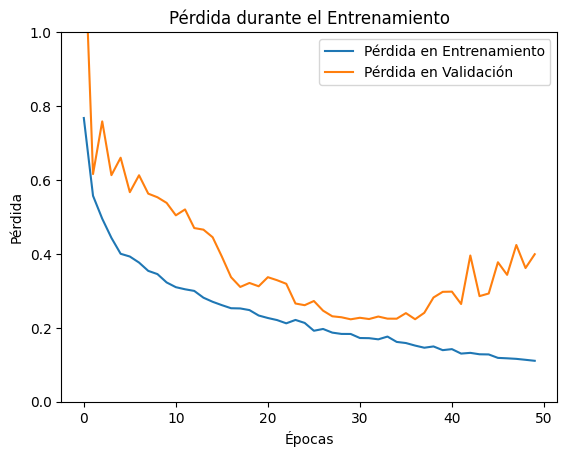

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9689


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4), #Se ajusta learning rate
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) # Se aumenta la paciencia en función de las modificaciones.
batch_size = 512 # Se incrementa el batch size
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


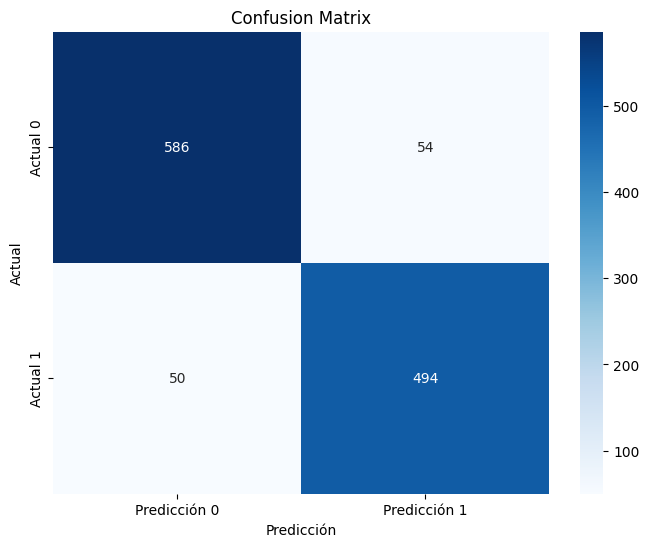

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       640
         1.0       0.90      0.91      0.90       544

    accuracy                           0.91      1184
   macro avg       0.91      0.91      0.91      1184
weighted avg       0.91      0.91      0.91      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## Red Neuronal Convolucional 4.

Objetivo: Intentar controlar un poco más el ligero sobreajuste observado.

Medida: Simplificar el modelo (Se reducen el N° de capas).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6409 - loss: 0.8249 - val_accuracy: 0.5726 - val_loss: 2.3601
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - accuracy: 0.8032 - loss: 0.5047 - val_accuracy: 0.7787 - val_loss: 0.6333
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 395ms/step - accuracy: 0.8336 - loss: 0.4183 - val_accuracy: 0.7306 - val_loss: 0.7333
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.8506 - loss: 0.3793 - val_accuracy: 0.7897 - val_loss: 0.5349
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 400ms/step - accuracy: 0.8672 - loss: 0.3393 - val_accuracy: 0.7948 - val_loss: 0.4893
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.8701 - loss: 0.3163 - val_accuracy: 0.8015 - val_loss: 0.4591
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.8934 - loss: 0.2850 - val_accuracy: 0.7973 - val_loss: 0.4416
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.8931 - loss: 0.2753 - val_accur

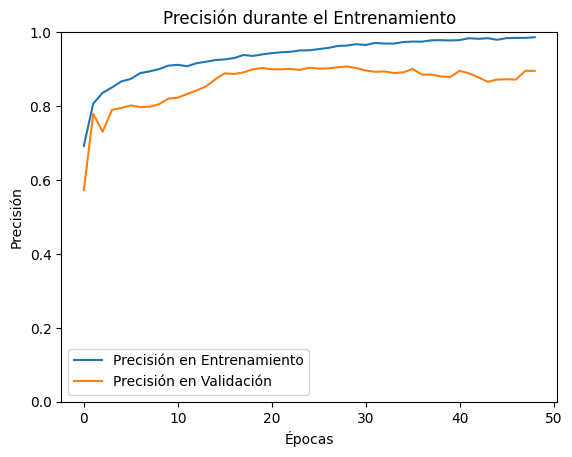

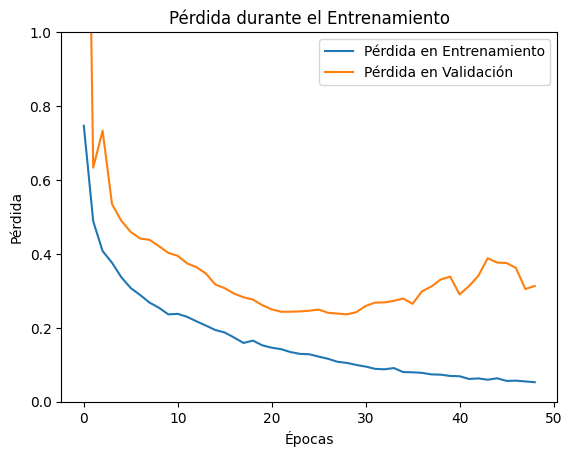

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9660


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4),
             metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
batch_size = 512
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

Conclusión: Disminuir las capas NO aportaron en la corrección del sobreajuste. No se considerará para los siguientes modelos.

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


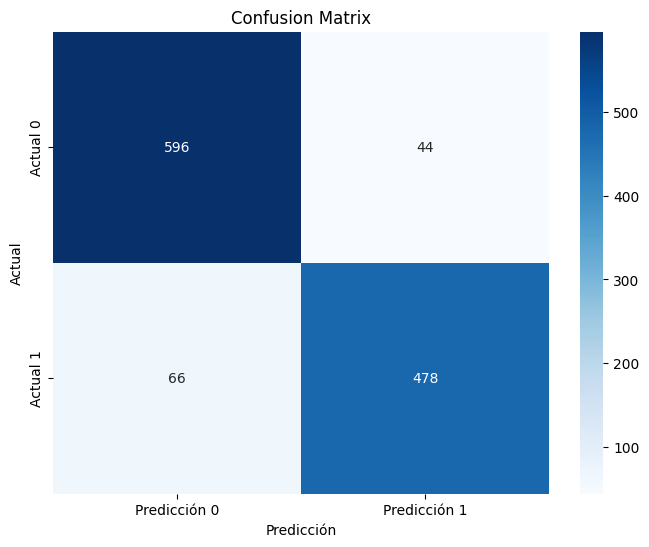

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       640
         1.0       0.92      0.88      0.90       544

    accuracy                           0.91      1184
   macro avg       0.91      0.90      0.91      1184
weighted avg       0.91      0.91      0.91      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## Red Neuronal Convolucional 5.
Se intenta seguir mejorando el sobreajuste.

Medida: Se añade regularización L2, con un valor muy bajo (0.0001) dado que el sobreajuste es muy ligero, y tampoco queremos empeorar los valores de pérdida (se ha observado que valores muy altos de regularización L2 aumenta considerablemente la pérdida en entrenamiento y validación).

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6209 - loss: 0.9196 - val_accuracy: 0.5693 - val_loss: 1.3942
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 397ms/step - accuracy: 0.7623 - loss: 0.6280 - val_accuracy: 0.5802 - val_loss: 1.0953
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 418ms/step - accuracy: 0.8000 - loss: 0.5871 - val_accuracy: 0.7221 - val_loss: 0.6284
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 398ms/step - accuracy: 0.8179 - loss: 0.5005 - val_accuracy: 0.6900 - val_loss: 0.7574
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 0.8341 - loss: 0.4881 - val_accuracy: 0.7348 - val_loss: 0.6651
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 409ms/step - accuracy: 0.8486 - loss: 0.4461 - val_accuracy: 0.7517 - val_loss: 0.5898
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step - accuracy: 0.8541 - loss: 0.4489 - val_accuracy: 0.7356 - val_loss: 0.6226
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 0.8589 - loss: 0.4162 - val_accura

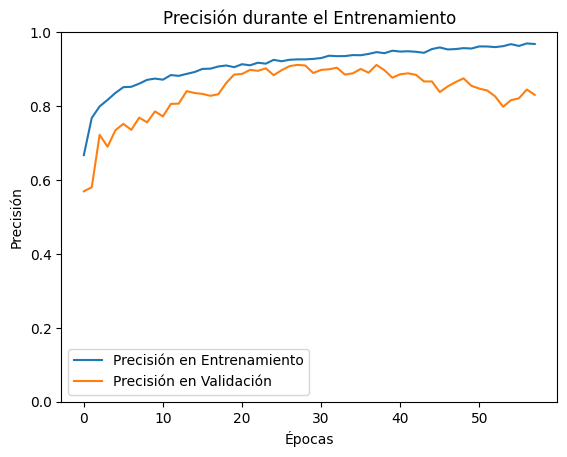

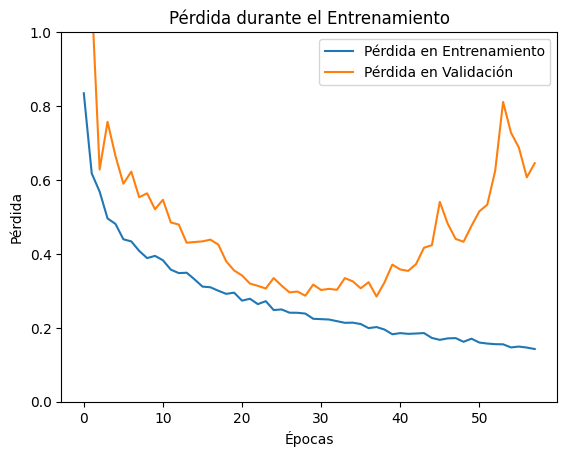

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9695


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4), kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5), kernel_regularizer=l2(0.0001))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4),
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
batch_size = 512
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

Conclusión: No se observan cambios significativos y se reduce ligeramente el AUC.

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


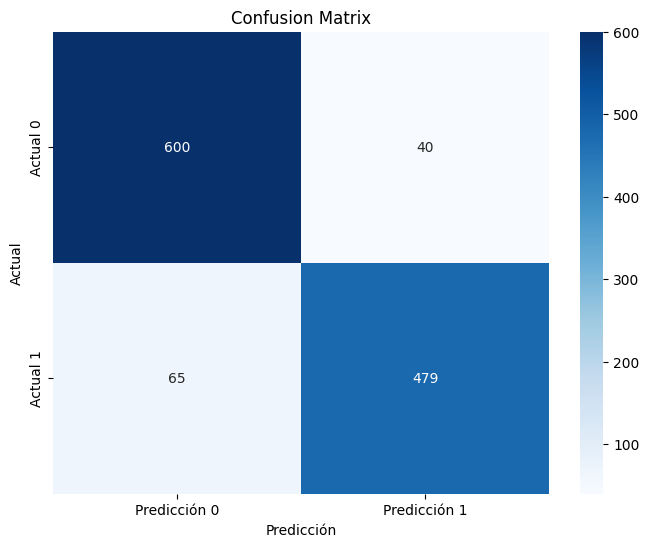

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       640
         1.0       0.92      0.88      0.90       544

    accuracy                           0.91      1184
   macro avg       0.91      0.91      0.91      1184
weighted avg       0.91      0.91      0.91      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## Red Neuronal Convolucional 6.
Se intenta mejorar aún más la precisión del modelo.

Medida: Se consideran los contornos de las imágenes a través de 'padding'.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6383 - loss: 0.7752 - val_accuracy: 0.7551 - val_loss: 0.5305
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 450ms/step - accuracy: 0.7946 - loss: 0.5201 - val_accuracy: 0.6512 - val_loss: 0.7235
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 463ms/step - accuracy: 0.8194 - loss: 0.4599 - val_accuracy: 0.7483 - val_loss: 0.5510
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 476ms/step - accuracy: 0.8425 - loss: 0.4047 - val_accuracy: 0.7551 - val_loss: 0.5433
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - accuracy: 0.8525 - loss: 0.3828 - val_accuracy: 0.7720 - val_loss: 0.5146
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.8672 - loss: 0.3407 - val_accuracy: 0.7669 - val_loss: 0.5136
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 478ms/step - accuracy: 0.8777 - loss: 0.3279 - val_accuracy: 0.7584 - val_loss: 0.5143
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 469ms/step - accuracy: 0.8778 - loss: 0.3304 - val_accura

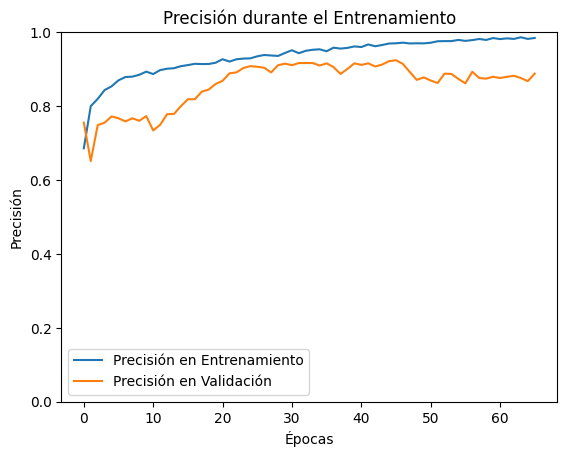

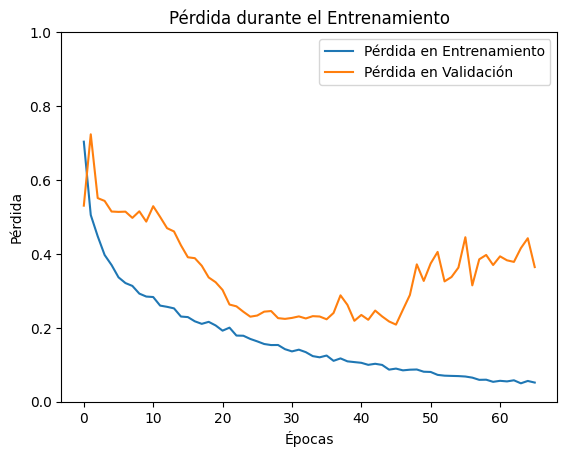

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
AUC del modelo: 0.9760


In [ ]:
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])


model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4),
             metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
batch_size = 512
history = model_cnn.fit(
X_train, y_train,
batch_size=batch_size,
epochs=100,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")

Conclusión: No mejora el modelo y disminuye el AUC.

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


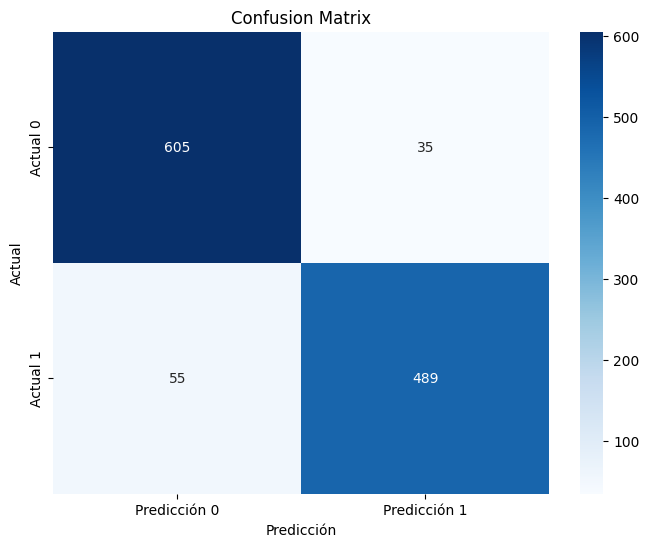

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       640
         1.0       0.93      0.90      0.92       544

    accuracy                           0.92      1184
   macro avg       0.92      0.92      0.92      1184
weighted avg       0.92      0.92      0.92      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## Red Neuronal Convolucional 7.

Se intenta reducir el leve overfitting aún presente en el entrenamiento

Medida: se añade data augmentation que incluye rotaciones y desplazamientos de una misma imagen con el fin aumentar la capacidad de generalizar del modelo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5915 - loss: 0.8790 - val_accuracy: 0.5769 - val_loss: 0.8673
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 0.7068 - loss: 0.6743 - val_accuracy: 0.5929 - val_loss: 0.7932
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 727ms/step - accuracy: 0.7600 - loss: 0.5914 - val_accuracy: 0.6047 - val_loss: 0.7750
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 963ms/step - accuracy: 0.7779 - loss: 0.5397 - val_accuracy: 0.7314 - val_loss: 0.5490
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 968ms/step - accuracy: 0.7970 - loss: 0.5309 - val_accuracy: 0.7035 - val_loss: 0.6069
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 848ms/step - accuracy: 0.8125 - loss: 0.4745 - val_accuracy: 0.7264 - val_loss: 0.5792
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 907ms/step - accuracy: 0.8205 - loss: 0.4536 - val_accuracy: 0.6993 - val_loss: 0.6722
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 40s 862ms/step - accuracy: 0.8290 - loss: 0.4395 - val_accuracy: 0.7424 - va

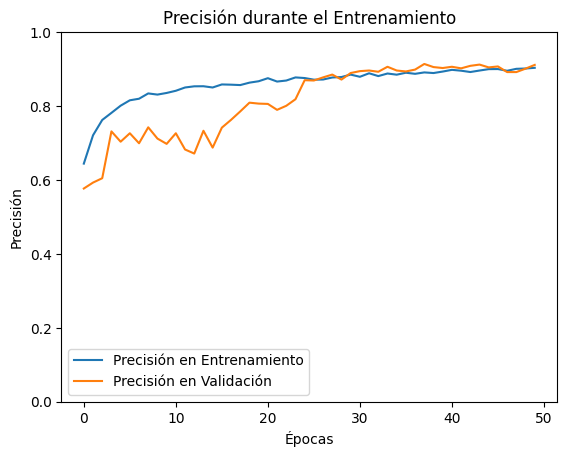

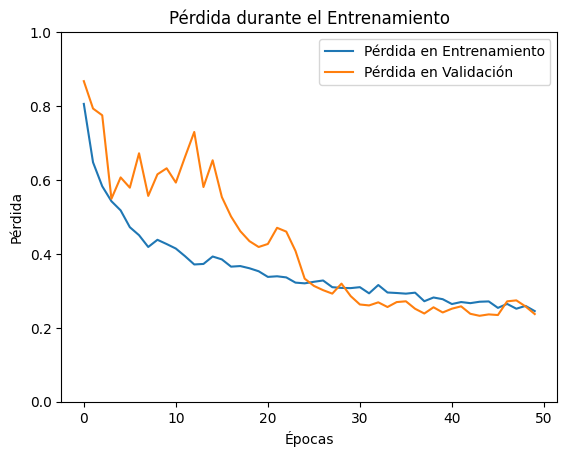

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
AUC del modelo: 0.9672


In [ ]:
# Configuración de data augmentation
batch_size = 512
datagen = ImageDataGenerator(
    rotation_range=20,         # Rotar imágenes hasta 20 grados
    width_shift_range=0.2,     # Desplazar horizontalmente
    height_shift_range=0.2,    # Desplazar verticalmente
    shear_range=0.2,           # Aplicar cizalladura
    zoom_range=0.2,            # Hacer zoom
    horizontal_flip=True,      # Invertir horizontalmente
    fill_mode='nearest'        # Método para rellenar píxeles faltantes
)

# Cargar datos y aplicar las transformaciones
train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+2)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+4)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=seed+5))
])

model_cnn.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate=1e-4), #Se ajusta learning rate
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) # Se aumenta la paciencia en función de las modificaciones.

history = model_cnn.fit(
train_generator,
batch_size=batch_size,
epochs=50,
verbose = 1,
validation_data=(X_test, y_test),
callbacks=[early_stopping]
)

#evalute the accuracy
train_acc=model_cnn.evaluate(X_train, y_train, batch_size=batch_size)[1]
test_acc=model_cnn.evaluate(X_test, y_test, batch_size=batch_size)[1]
print(f'Training accuracy: {train_acc:.2f}')
print(f'Test accuracy: {test_acc:.2f}')

# Graficamos la precisión
plt.plot(history.history['accuracy'], label='Precisión en Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim(0, 1)
plt.legend()
plt.title('Precisión durante el Entrenamiento')
plt.show()

# Graficamos la pérdida
plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.ylim(0, 1)
plt.legend()
plt.title('Pérdida durante el Entrenamiento')
plt.show()

# Evaluamos el modelo con AUC
y_pred_prob = model_cnn.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC del modelo: {auc:.4f}")


Se puede observar un leve aumento del AUC y además no se observa overfitting visualizando las funciones de pérdida

**Matriz de Confusión y Classification Report**

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


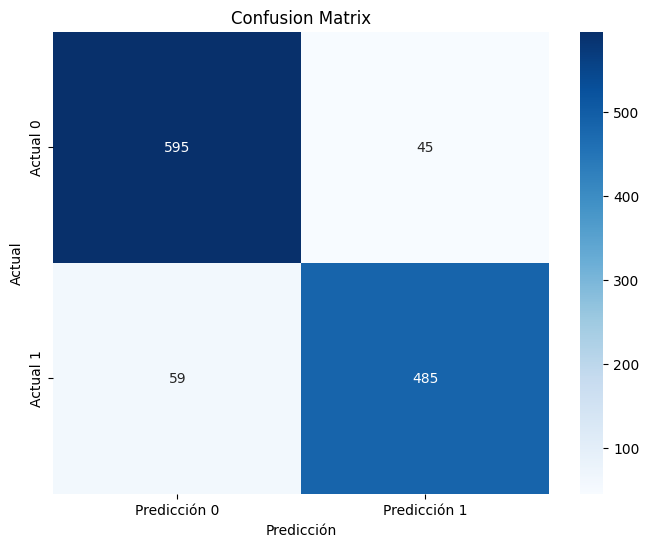

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       640
         1.0       0.92      0.89      0.90       544

    accuracy                           0.91      1184
   macro avg       0.91      0.91      0.91      1184
weighted avg       0.91      0.91      0.91      1184



In [ ]:
y_pred = (model_cnn.predict(X_test) > 0.5).astype("int32")

# Matriz de Confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicción 0', 'Predicción 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Imprimir Classification Report
print(classification_report(y_test, y_pred))

## 6. Comparación de Modelos

En el laboratorio presentamos la construcción y evaluación de varios modelos para la clasificación de imágenes de muffins y chihuahuas. Se utilizaron dos tipos principales de modelos:

Perceptrón Multicapa (MLP): Este modelo, al ser una red neuronal tradicional, tuvo dificultades para capturar las características complejas de las imágenes, resultando en un rendimiento relativamente bajo.

Redes Neuronales Convolucionales (CNN): Se desarrollaron varias arquitecturas CNN, buscando mejorar la precisión y el ajuste del modelo.

*   CNN 1: La primera arquitectura CNN, si bien logró una alta precisión en el entrenamiento, presentó un problema de sobreajuste, indicando que no generalizaba bien a datos nuevos.
*   CNN 2: Se incorporó la técnica de Dropout para controlar el sobreajuste, logrando una mejora en la generalización del modelo y un mejor rendimiento en el conjunto de prueba.

*   CNN 3: Se ajustaron el learning rate y el batch size para controlar el ruido y mejorar la estabilidad del modelo, resultando en un modelo con un buen equilibrio entre precisión y ajuste.

*   CNN 4, 5, 6: Se exploraron otras modificaciones como la reducción de capas, la regularización L2 y el uso de padding. Sin embargo, estas modificaciones no lograron superar el rendimiento de la CNN 3.
*   CNN 7: Se incorporó data augmentation, que consiste en aplicar transformaciones a las imágenes de entrenamiento para aumentar la cantidad de datos y mejorar la capacidad de generalización del modelo. Esto ayudó a reducir el sobreajuste y mejoró el rendimiento general.

## Modelo con el mejor rendimiento

El mejor modelo fue la CNN 7 (con data augmentation). Esta arquitectura, junto con las técnicas de regularización y los ajustes de hiperparámetros, logró un buen equilibrio entre precisión, ajuste y estabilidad.

### Razones para destacar la CNN 7:

*   **Mejor rendimiento general**: Obtuvo el AUC más alto, lo que indica un buen poder de discriminación entre las clases.

*  **Control del sobreajuste**: Gracias al Dropout y al data augmentation, se minimizó el sobreajuste, logrando una mejor generalización.


### Métricas por modelo

### Imágenes clasificadas erróneamente

In [ ]:
def plot_images_in_grid(images, titles, n_examples=10, n_rows=2, figsize=(15, 5)):
    """
    Generaliza la creación de una grilla para mostrar imágenes.

    Parameters:
    - images: Lista de imágenes a mostrar.
    - titles: Lista de títulos para cada imagen.
    - n_examples: Número máximo de ejemplos a mostrar.
    - n_rows: Número de filas en la grilla.
    - figsize: Tamaño de la figura (tupla).
    """
    n_cols = (n_examples + n_rows - 1) // n_rows  # Calcula el número de columnas
    fig, ax = plt.subplots(n_rows, n_cols, figsize=figsize)

    # Asegura que 'ax' sea una matriz bidimensional
    ax = ax.flatten() if n_rows > 1 else [ax]

    for idx in range(len(ax)):
        if idx < n_examples and idx < len(images):
            ax[idx].imshow(images[idx])
            ax[idx].set_title(titles[idx])
            ax[idx].axis('off')
        else:
            ax[idx].axis('off')  # Desactiva las subtramas no usadas

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

Ejemplos de clasificaciones erróneas en el mejor modelo (segundo modelo convolucional)

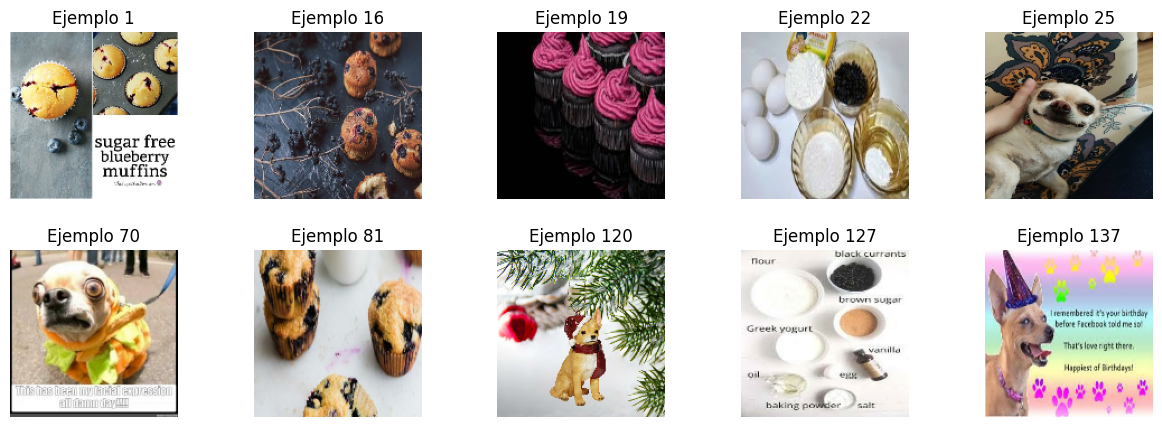

In [ ]:
n_examples = 10
n_rows = 2

# Filtrar las imágenes y títulos a mostrar
filtered_images = [X_test[i] / 255 for i in range(len(y_test)) if y_pred_cnn[i] != y_test[i]]
filtered_titles = [f'Ejemplo {i}' for i in range(len(y_test)) if y_pred_cnn[i] != y_test[i]]

# Limitar al número de ejemplos deseados
filtered_images = filtered_images[:n_examples]
filtered_titles = filtered_titles[:n_examples]

# Llamar a la función para graficar
plot_images_in_grid(filtered_images, filtered_titles, n_examples=n_examples, n_rows=n_rows)


Se puede ver la gran dificultad para la clasificación en las imágenes mostrados para el modelo con mejor desempeño. Ejemplos como el 55, 73 y 91 son muffins agrupados juntos que se ven muy similares a chihuahuas agrupados como en el ejemplo 95.

Ejemplos de clasificaciones erróneas en el primer modelo convolucional pero correctas en el segundo

En este caso se puede ver que el segundo modelo convolucional tiende a captar de mejor manera las diferentes poses de los chihuahuas como en el ejemplo 6 y 187, donde el primer modelo falla en clasificar. Casos como el 32 el segundo modelo convolucional es capaz de clasificarlo correctamente pese a ser animado.

## 7. Conclusiones